# Exercise 6.1: Make a dictionary from a table

In [1]:
import requests

def get_constants():
    data = requests.get("https://raw.githubusercontent.com/hplgit/scipro-primer/master/src/dictstring/constants.txt").text
    return {' '.join(row[:-2]): float(row[-2]) for row in [line.split() for line in data.splitlines()[2:]]}
    
get_constants()

{'Avogadro number': 6.0221367e+23,
 'Boltzmann constant': 1.380658e-23,
 'Planck constant': 6.6260755e-34,
 'electron mass': 9.1093897e-31,
 'elementary charge': 1.60217733e-19,
 'gravitational constant': 6.67259e-11,
 'proton mass': 1.6726231e-27,
 'speed of light': 299792458.0}

# Exercise 6.2: Explore syntax differences: lists vs. dicts

In [2]:
t2 = [0] * 2
t2[0] = -5
t2[1] = 10.5

# or
t3 = []
t3.append(-5)
t3.append(10.5)

# Exercise 6.3: Use string operations to improve a program

In [3]:
def read_densities_1():
    data = requests.get("https://raw.githubusercontent.com/hplgit/scipro-primer/master/src/dictstring/densities.dat").text
    return {' '.join(row[:-1]): float(row[-1]) for row in [line.split() for line in data.splitlines()]}

read_densities_1()

{'Earth core': 13.0,
 'Earth mean': 5.52,
 'Moon': 3.3,
 'Sun core': 160.0,
 'Sun mean': 1.4,
 'air': 0.0012,
 'gasoline': 0.67,
 'gold': 18.9,
 'granite': 2.7,
 'human body': 1.03,
 'ice': 0.9,
 'iron': 7.8,
 'limestone': 2.6,
 'mercury': 13.6,
 'platinium': 21.4,
 'proton': 230000000000000.0,
 'pure water': 1.0,
 'seawater': 1.025,
 'silver': 10.5}

In [4]:
def read_densities_2():
    data = requests.get("https://raw.githubusercontent.com/hplgit/scipro-primer/master/src/dictstring/densities.dat").text
    return {name.strip(): float(value) for name, value in [(line[:12], line[12:]) for line in data.splitlines()]}

read_densities_2()

{'Earth core': 13.0,
 'Earth mean': 5.52,
 'Moon': 3.3,
 'Sun core': 160.0,
 'Sun mean': 1.4,
 'air': 0.0012,
 'gasoline': 0.67,
 'gold': 18.9,
 'granite': 2.7,
 'human body': 1.03,
 'ice': 0.9,
 'iron': 7.8,
 'limestone': 2.6,
 'mercury': 13.6,
 'platinium': 21.4,
 'proton': 230000000000000.0,
 'pure water': 1.0,
 'seawater': 1.025,
 'silver': 10.5}

In [5]:
def test_densities():
    assert read_densities_1() == read_densities_2()
test_densities()

# Exercise 6.4: Interpret output from a progam

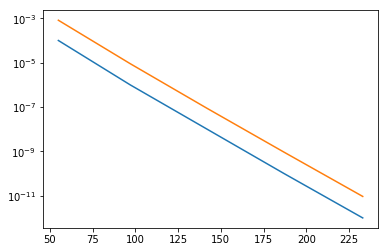

In [6]:
import numpy as np
import matplotlib.pyplot as plt

with open("stuff/lnsum.txt") as f:
    data = f.readlines()[24:]

epsilon = np.array([float(line[9:14]) for line in data])
error = np.array([float(line[29:37]) for line in data])
n = np.array([int(line[41:]) for line in data])

plt.semilogy(n, epsilon, n, error)
plt.show()

# Exercise 6.5: Make a dictionary

In [7]:
exec(requests.get("https://raw.githubusercontent.com/hplgit/scipro-primer/master/src/funcif/stars.txt").text)
d = {row[0]: row[-1] for row in data}
d

{'Alpha Centauri A': 1.56,
 'Alpha Centauri B': 0.45,
 'Alpha Centauri C': 6e-05,
 'BD +36 degrees 2147': 0.006,
 "Barnard's Star": 0.0005,
 'Luyten 726-8 A': 6e-05,
 'Luyten 726-8 B': 4e-05,
 'Ross 154': 0.0005,
 'Sirius A': 23.6,
 'Sirius B': 0.003,
 'Wolf 359': 2e-05}

# Exercise 6.6: Make a nested dictionary

In [8]:
d = {row[0]: {"distance": row[1], "apparent brightness": row[2], "luminosity": row[3]} for row in data}
from pprint import pprint
pprint(d)

{'Alpha Centauri A': {'apparent brightness': 0.26,
                      'distance': 4.3,
                      'luminosity': 1.56},
 'Alpha Centauri B': {'apparent brightness': 0.077,
                      'distance': 4.3,
                      'luminosity': 0.45},
 'Alpha Centauri C': {'apparent brightness': 1e-05,
                      'distance': 4.2,
                      'luminosity': 6e-05},
 'BD +36 degrees 2147': {'apparent brightness': 0.0003,
                         'distance': 8.2,
                         'luminosity': 0.006},
 "Barnard's Star": {'apparent brightness': 4e-05,
                    'distance': 6.0,
                    'luminosity': 0.0005},
 'Luyten 726-8 A': {'apparent brightness': 3e-06,
                    'distance': 8.4,
                    'luminosity': 6e-05},
 'Luyten 726-8 B': {'apparent brightness': 2e-06,
                    'distance': 8.4,
                    'luminosity': 4e-05},
 'Ross 154': {'apparent brightness': 2e-05,
              'distan

# Exercise 6.7: Make a nested dictionary from a file

In [9]:
data = requests.get("https://raw.githubusercontent.com/hplgit/scipro-primer/master/src/dictstring/human_evolution.txt").text.splitlines()[3:-3]
humans = {row[:19].strip(): {
    'when': row[21:34].strip(),
    'height': row[37:46].strip(),
    'mass': row[50:58].strip(),
    'brain volume': row[62:].strip()
} for row in data}
pprint(humans)

{'H. erectus': {'brain volume': '850 (early) - 1100 (late)',
                'height': '1.8',
                'mass': '60',
                'when': '1.4 - 0.2'},
 'H. ergaster': {'brain volume': '700 - 850',
                 'height': '1.9',
                 'mass': '',
                 'when': '1.9 - 1.4'},
 'H. floresiensis': {'brain volume': '400',
                     'height': '1.0',
                     'mass': '25',
                     'when': '0.10 - 0.012'},
 'H. habilis': {'brain volume': '660',
                'height': '1.0 - 1.5',
                'mass': '33 - 55',
                'when': '2.2 - 1.6'},
 'H. heidelbergensis': {'brain volume': '1100 - 1400',
                        'height': '1.8',
                        'mass': '60',
                        'when': '0.6 - 0.35'},
 'H. neanderthalensis': {'brain volume': '1200 - 1700',
                         'height': '1.6',
                         'mass': '55 - 70',
                         'when': '0.35 - 0.03'},
 'H.

# Exercise 6.8: Make a nested dictionary from a file

In [10]:
data = requests.get("https://raw.githubusercontent.com/hplgit/scipro-primer/master/src/dictstring/viscosity_of_gases.dat").text
print(data)

# Viscosity data of some gases
# Sutherland's formula for the viscosity:
#  mu = mu_0*(T_0 + C)/(T + C)(T/T_0)**1.5
# Column 1: gas name
# Column 2: C (in Kelvin) (Sutherland's constant)
# Column 3: T_0 (in Kelvin)
# Column 4: mu_0 (in 10**-6 Pa*s)

#   gas           C     T_0     mu_0
air              120   291.15   18.27
nitrogen         111   300.55   17.81
oxygen           127   292.25   20.18
carbon dioxide   240   293.15   14.8
carbon monoxide  118   288.15   17.2
hydrogen          72   293.85   8.76
ammonia          370   293.15   9.82
sulphur dioxide  416   293.65   12.54

# Source: http://en.wikipedia.org/wiki/Viscosity




In [11]:
data = requests.get("https://raw.githubusercontent.com/hplgit/scipro-primer/master/src/dictstring/viscosity_of_gases.dat").text.splitlines()[9:17]
mu_data = {row[:15].strip(): {'C': float(row[17:20]), 'T_0': float(row[23:29]), 'mu_0': float(row[32:])} for row in data}
pprint(mu_data)

{'air': {'C': 120.0, 'T_0': 291.15, 'mu_0': 18.27},
 'ammonia': {'C': 370.0, 'T_0': 293.15, 'mu_0': 9.82},
 'carbon dioxide': {'C': 240.0, 'T_0': 293.15, 'mu_0': 14.8},
 'carbon monoxide': {'C': 118.0, 'T_0': 288.15, 'mu_0': 17.2},
 'hydrogen': {'C': 72.0, 'T_0': 293.85, 'mu_0': 8.76},
 'nitrogen': {'C': 111.0, 'T_0': 300.55, 'mu_0': 17.81},
 'oxygen': {'C': 127.0, 'T_0': 292.25, 'mu_0': 20.18},
 'sulphur dioxide': {'C': 416.0, 'T_0': 293.65, 'mu_0': 12.54}}


In [12]:
def mu(T, gas, mu_data):
    mu_0 = mu_data[gas]['mu_0']
    T_0 = mu_data[gas]['T_0']
    C = mu_data[gas]['C']
    return mu_0 * (T_0 + C) / (T + C) * (T/T_0)**1.5

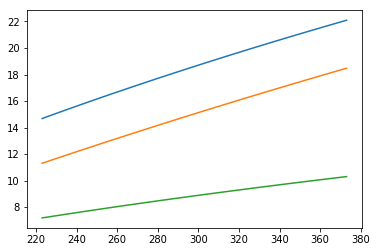

In [13]:
T = np.linspace(223, 373)
plt.figure()
plt.plot(T, mu(T, "air", mu_data))
plt.plot(T, mu(T, "carbon dioxide", mu_data))
plt.plot(T, mu(T, "hydrogen", mu_data))
plt.show()

# Exercise 6.9: Compute the area of a triangle

In [14]:
def triangle_area(v):
    return 1/2 * abs(v[2][0]*v[3][1] - v[3][0]*v[2][1] - v[1][0]*v[3][1] + v[3][0]*v[1][1] + v[1][0]*v[2][1] - v[2][0]*v[1][1])

In [15]:
triangle_area({1: (0,0), 2: (1,0), 3: (0,2)})

1.0

# Exercise 9.10: Compare data structures for polynomials

In [16]:
poly_list = [-0.5] + [0]*99 + [2]
poly_dict = {0: -0.5, 100: 2}

def eval_poly_dict(poly, x):
    return sum(poly[power]*x**power for power in poly)

def eval_poly_list(poly, x):
    return sum(poly[power]*x**power for power in range(len(poly)))

print(eval_poly_list(poly_list, 1.05))
print(eval_poly_dict(poly_dict, 1.05))

262.50251569260803
262.50251569260803


# Exercise 6.11: Compute the derivative of a polynomial

In [17]:
def diff(poly):
    dp = poly.copy()
    del dp[0]
    dp = {k - 1: k * v for (k, v) in dp.items()}
    return dp

p = {0: -3, 3: 2, 5: -1}
diff(p)

{2: 6, 4: -5}

# Exercise 6.14: Compare average temperatures in cities

In [18]:
with open("stuff/city_temp/citylistWorld.htm") as f:
    data = f.read()
    
data = data.split("'><b>")[1:]
names =  []
files = []
for row in data:
    names.append(row[: row.find('</b>') - 3])
    f = row[row.find('">') + 2 : row.find("</a>")]
    files.append(f if f.endswith(".txt") else f[f.find("'>") + 2 : f.find("</span>")])

filenames = {k: v for k, v in zip(names, files)}

from pprint import pprint
pprint(filenames)

{'Abidjan': 'IVABIDJN.txt',
 'Abu Dh': 'ERABUDBI.txt',
 'Addis Ababa': 'ETADSABA.txt',
 'Algiers': 'ALALGIER.txt',
 'Almaty': 'RAALMATY.txt',
 'Amman': 'JDAMMAN.txt',
 'Amsterdam': 'NLAMSTDM.txt',
 'Ankara': 'TUANKARA.txt',
 'Antananarivo': 'MGANTRVO.txt',
 'Ashabad': 'RAASHBAD.txt',
 'Athens': 'GRATHENS.txt',
 'Auckland': 'NZACKLND.txt',
 'Bangkok': 'THBNGKOK.txt',
 'Bangui': 'CEBANGUI.txt',
 'Banjul': 'GBBANJUL.txt',
 'Barcelona': 'SPBRCLNA.txt',
 'Beijing': 'CIBIEJNG.txt',
 'Beirut': 'LBBEIRUT.txt',
 'Belfast': 'UKBELFST.txt',
 'Belgrade': 'YGBLGRDE.txt',
 'Belize City': 'BHBELIZE.txt',
 'Bern': 'SWBERN.txt',
 'Bilbao': 'SPBILBAO.txt',
 'Bishkek': 'RABSHKEK.txt',
 'Bissau': 'GWBISSAU.txt',
 'Bogota': 'COBOGOTA.txt',
 'Bombay (Mumbai)': 'INBOMBAY.txt',
 'Bonn': 'DLBONN.txt',
 'Bordeaux': 'FRBRDAUX.txt',
 'Brasilia': 'BZBRSLIA.txt',
 'Bratislava': 'CZBRTSLV.txt',
 'Brazzaville': 'CGBRZAVL.txt',
 'Bridgetown': 'BRBRGTWN.txt',
 'Brisbane': 'AUBRSBAN.txt',
 'Brussels': 'BXBRUSSL.txt',
 '

In [19]:
import numpy as np
from datetime import datetime
def open_data(city, filenames):
    data = np.loadtxt("stuff/city_temp/" + filenames[city])
    data = np.array([[datetime(int(y), int(m), int(d)), t] for m, d, y, t in data])
    return data

open_data("London", filenames)

array([[datetime.datetime(1995, 1, 1, 0, 0), 34.200000000000003],
       [datetime.datetime(1995, 1, 2, 0, 0), 32.600000000000001],
       [datetime.datetime(1995, 1, 3, 0, 0), 30.899999999999999],
       ..., 
       [datetime.datetime(2007, 7, 8, 0, 0), 61.0],
       [datetime.datetime(2007, 7, 9, 0, 0), 59.799999999999997],
       [datetime.datetime(2007, 7, 10, 0, 0), 59.899999999999999]], dtype=object)

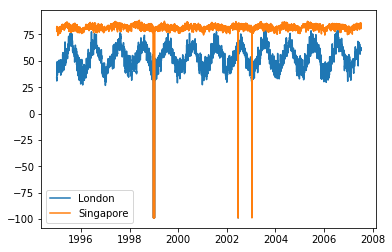

In [20]:
import matplotlib.pyplot as plt

def plot_city_temp(city_data):
    plt.figure()
    for city in city_data:
        plt.plot(city_data[city][:, 0], city_data[city][:, 1], label=city)
    plt.legend()
    plt.show()
    
plot_city_temp({city: open_data(city, filenames) for city in ["London", "Singapore"]})

# Exercise 6.15: Generate an HTML report with figures

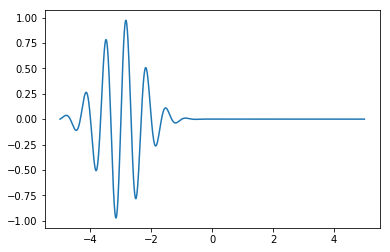

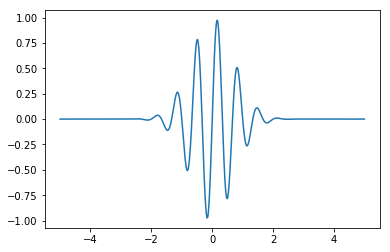

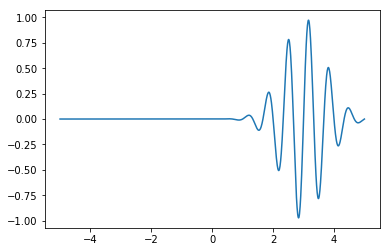

In [21]:
from numpy import exp, sin, pi, linspace
f = lambda x, t: exp(-(x - 3*t)**2) * sin(3*pi * (x - t))
x = linspace(-5, 5, 1000)

plt.figure()
plt.plot(x, f(x, -1))
plt.savefig("stuff/wavepacket1.png")
plt.show()

plt.figure()
plt.plot(x, f(x, 0))
plt.savefig("stuff/wavepacket2.png")
plt.show()

plt.figure()
plt.plot(x, f(x, 1))
plt.savefig("stuff/wavepacket3.png")
plt.show()

In [22]:
# file: code/615.html

# Exercise 6.16: Allow different types for a function argument

In [23]:
def find_consensus_v1(frequency_matrix):
    base2index = {'A': 0, 'C': 1, 'G': 2, 'T': 3}
    consensus = ""
    dna_length = len(frequency_matrix[0])
    
    for i in range(dna_length):    # loop over positions in string 
        max_freq = -1              # holds the max freq. for this i 
        max_freq_base = None       # holds the corresponding base
        
        for base in "ATGC":
            if frequency_matrix[base2index[base]][i] > max_freq:
                max_freq = frequency_matrix[base2index[base]][i]
                max_freq_base = base
            elif frequency_matrix[base2index[base]][i] == max_freq:
                max_freq_base = "-"     # more than one base as max
                
        consensus += max_freq_base     # add new base with max freq return consensus
        
    return consensus

def find_consensus_v2(frequency_matrix):
    consensus = ""
    dna_length = len(frequency_matrix['A'])
    
    for i in range(dna_length):    # loop over positions in string 
        max_freq = -1              # holds the max freq. for this i 
        max_freq_base = None       # holds the corresponding base
        
        for base in "ACGT":
            if frequency_matrix[base][i] > max_freq:
                max_freq = frequency_matrix[base][i]
                max_freq_base = base
            elif frequency_matrix[base][i] == max_freq:
                max_freq_base = "-"     # more than one base as max

        consensus += max_freq_base    # add new base with max freq return consensus
    
    return consensus

def find_consensus(frequency_matrix, dna_length=None):
    if isinstance(frequency_matrix, list) and isinstance(frequency_matrix[0], list):
        return find_consensus_v1(frequency_matrix)
    elif isinstance(frequency_matrix, dict) and isinstance(frequency_matrix['A'], list):
        return find_consensus_v2(frequency_matrix)
    else: return None
    
f_mat =  [[2, 0, 2],
          [1, 2, 0],
          [0, 1, 0],
          [0, 0, 1]]
print(find_consensus(f_mat))

f_mat =  {'A': [2, 0, 2],
          'C': [1, 2, 0],
          'G': [0, 1, 0],
          'T': [0, 0, 1]}
print(find_consensus(f_mat))

ACA
ACA


# Exercise 6.17: Make a function more robust

In [24]:
from collections import defaultdict
def get_base_counts2(dna):
    counts = defaultdict(int)
    for base in dna:
        counts[base] += 1
    return dict(counts)

get_base_counts2("ADLSTTLLD")

{'A': 1, 'D': 2, 'L': 3, 'S': 1, 'T': 2}

# Exercise 6.18: Find proportion of bases inside/outside exons

In [25]:
exons = requests.get("https://raw.githubusercontent.com/hplgit/bioinf-py/master/data/lactase_exon.tsv").text.splitlines()
gene = ''.join(requests.get("https://raw.githubusercontent.com/hplgit/bioinf-py/master/data/lactase_gene.txt").text.split())
introns = ''.join([gene[start:end] for start, end in [(int(exons[i].split()[1]), (int(exons[i + 1].split()[0]) if i + 1 < len(exons) else None)) for i in range(len(exons))]])
exons = ''.join([gene[int(start):int(end)] for start, end in [line.split() for line in exons]])

In [26]:
print(f"""
Base frequency for A in:
Exons: {exons.count('A') / len(exons)}
Introns: {introns.count('A') / len(introns)}
""")


Base frequency for A in:
Exons: 0.2445011157156519
Introns: 0.2590450977660118

